In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data
import numpy as np
from src.network.yolo import Yolo
from src.config import VOC_ANCHORS
from src.utils.process_boxes import preprocess_true_boxes
from src.config import IOU_THRESHOLD, TENSORBOARD_PATH
from tensorboardX import SummaryWriter
from datetime import datetime




general_transform = Compose([
    Resize((448, 448)),
    XyToCenter()
])


transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [
                                     0.229, 0.224, 0.225])
            ])

In [3]:
batch_size = 1

ds = OpenImage('/data/data', 'OpenImage', general_transform=general_transform, transform=transform)

train_data_loader = DataLoader(ds, batch_size=batch_size, shuffle=True, collate_fn=convert_data, num_workers=1, drop_last=True)

2019-04-15 10:33:53,310 base_logger     INFO     Process-1  [ 0.0625      0.69546121 -0.10045353  0.65648723  0.          0.
  1.        ]
2019-04-15 10:33:53,312 base_logger     INFO     Process-1  [ 0.765625    0.34553441 -0.20223622  0.76852643  0.          0.
  1.        ]
2019-04-15 10:33:53,314 base_logger     INFO     Process-1  [ 0.12207031  0.81112736  0.04210954 -0.02640344  0.          0.
  1.        ]
2019-04-15 10:33:53,315 base_logger     INFO     Process-1  [ 0.703125    0.38213763 -0.46638781 -0.29388279  0.          0.
  1.        ]
2019-04-15 10:33:53,317 base_logger     INFO     Process-1  [0.30566406 0.41581258 0.36287111 0.12291776 0.         0.
 1.        ]
2019-04-15 10:33:53,318 base_logger     INFO     Process-1  [ 0.16894531  0.86383599 -1.20716298  0.22491099  0.          0.
  1.        ]
2019-04-15 10:33:53,320 base_logger     INFO     Process-1  [ 0.90527344  0.20644216 -0.33312914 -0.43421766  0.          0.
  1.        ]
2019-04-15 10:33:53,321 base_logge

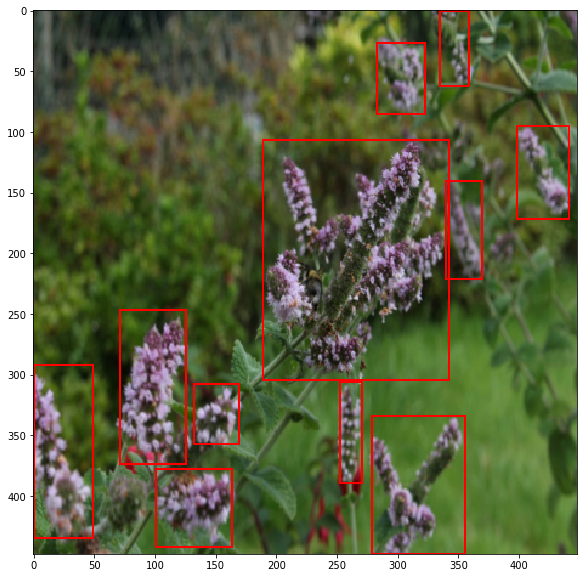

2019-04-15 10:33:53,965 base_logger     INFO     Process-1  [0.16113281 0.6484375  0.09679627 0.50579596 0.         1.
 0.        ]
2019-04-15 10:33:53,976 base_logger     INFO     Process-1  [ 0.15429688  0.54817706  0.0536082  -0.00787601  0.          1.
  0.        ]


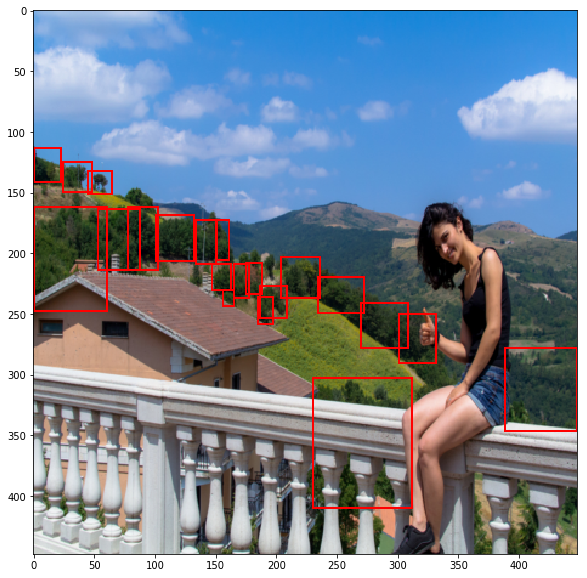

In [4]:
for step, blobs in enumerate(train_data_loader):
    if step > 1:
        break
    batch_tensor, batch_boxes, detectors_mask, matching_true_boxes, im_info, img_names = blobs

    for k in range(batch_tensor.shape[0]):
        current_im_info = im_info[k]
        tmp = batch_boxes[k] * torch.Tensor([current_im_info[0], current_im_info[1], current_im_info[0], current_im_info[1], 1])
        tmp = tmp.numpy()        
        between = tmp[:, 2:4] / 2        
        xy = tmp[:, :2]
        xy_min = xy - between
        xy_max = xy + between
        imshow(batch_tensor[k], gt_boxes=np.hstack((xy_min, xy_max)))    